# <center>Homework 3<center> 
##### <center>ECE5554 - Virginia Tech | Author: Rebecca DeSipio | Due Date: July 27th, 2022 <center>
------------------------------------------------------

In [1]:
# import libraries
import numpy as np
import cv2

import matplotlib.pyplot as plt

In [2]:
## ----------------------------------------------------------------------------------
##                                  Part (a)
## Load the images and make a copy of the color version
## ----------------------------------------------------------------------------------
elvis        = cv2.imread('Elvis1956.png').astype(np.float32)
chartres     = cv2.imread('Chartres.png').astype(np.float32)
calvinHobbes = cv2.imread('CalvinAndHobbes.png').astype(np.float32)
allmanBros   = cv2.imread('AllmanBrothers.png').astype(np.float32)

# make copies of the original images
elvis_copy         = elvis.copy()
elvis_copy2        = elvis.copy()
chartres_copy      = chartres.copy()
chartres_copy2     = chartres.copy()
calvinHobbes_copy  = calvinHobbes.copy()
calvinHobbes_copy2 = calvinHobbes.copy()
allmanBros_copy    = allmanBros.copy()
allmanBros_copy2    = allmanBros.copy()

print("Shapes of images: ")
print('Elvis: ', np.shape(elvis), ' | Chartres: ', np.shape(chartres), ' | Calvin and Hobbes: ', np.shape(calvinHobbes), ' | Allman Brothers: ', np.shape(allmanBros))

Shapes of images: 
Elvis:  (1600, 1209, 3)  | Chartres:  (756, 503, 3)  | Calvin and Hobbes:  (714, 900, 3)  | Allman Brothers:  (383, 681, 3)


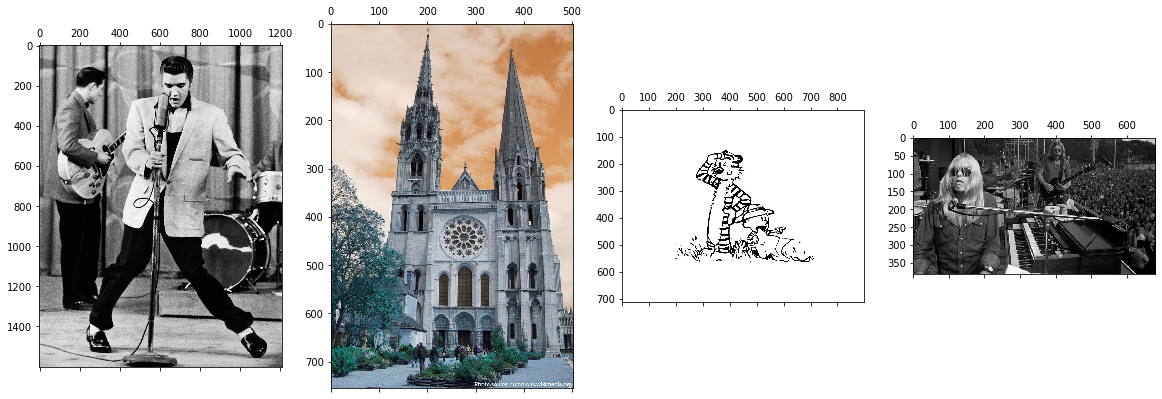

In [3]:
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(20,10))
ax1.matshow(elvis.astype(np.uint8))
ax2.matshow(chartres.astype(np.uint8))
ax3.matshow(calvinHobbes.astype(np.uint8))
ax4.matshow(allmanBros.astype(np.uint8))

plt.show()

In [4]:
## ----------------------------------------------------------------------------------
##                                  Part (b)
## Covert the original images to grayscale
## ----------------------------------------------------------------------------------
elvis_gray        = ((elvis[:,:,2] + elvis[:,:,1] + elvis[:,:,0]) / 3)
chartres_gray     = ((chartres[:,:,2] + chartres[:,:,1] + chartres[:,:,0]) / 3)
calvinHobbes_gray = ((calvinHobbes[:,:,2] + calvinHobbes[:,:,1] + calvinHobbes[:,:,0]) / 3)
allmanBros_gray   = ((allmanBros[:,:,2] + allmanBros[:,:,1] + allmanBros[:,:,0]) / 3)


print("Shape of grayscale images: ")
print('Elvis: ', np.shape(elvis_gray), ' | Chartres: ', np.shape(chartres_gray), ' | Calvin and Hobbes: ', np.shape(calvinHobbes_gray), ' | Allman Brothers: ', np.shape(allmanBros_gray))

Shape of grayscale images: 
Elvis:  (1600, 1209)  | Chartres:  (756, 503)  | Calvin and Hobbes:  (714, 900)  | Allman Brothers:  (383, 681)


In [5]:
## ----------------------------------------------------------------------------------
##                                  Part (c)
## Find the top 100 keypoints using the goodFeaturesToTrack function
## ----------------------------------------------------------------------------------
elvis_corners        = cv2.goodFeaturesToTrack(elvis_gray, 100, 0.01, 10)
chartres_corners     = cv2.goodFeaturesToTrack(chartres_gray, 100, 0.01, 10)
calvinHobbes_corners = cv2.goodFeaturesToTrack(calvinHobbes_gray, 100, 0.01, 10)
allmanBros_corners   = cv2.goodFeaturesToTrack(allmanBros_gray, 100, 0.01, 10)

In [6]:
## ----------------------------------------------------------------------------------
##                                  Part (d)
## Print the filename and the [X,Y] coordinates of the top 3 corner points
## ----------------------------------------------------------------------------------
print('Top 3 corner points for each image: ')
print('Elvis: ', elvis_corners[0:3].tolist())
print('Chartres: ', chartres_corners[0:3].tolist())
print('Calvin & Hobbes: ', calvinHobbes_corners[0:3].tolist())
print('Allman Brothers: ', allmanBros_corners[0:3].tolist())

Top 3 corner points for each image: 
Elvis:  [[[579.0, 411.0]], [[616.0, 426.0]], [[577.0, 399.0]]]
Chartres:  [[[307.0, 748.0]], [[319.0, 744.0]], [[318.0, 680.0]]]
Calvin & Hobbes:  [[[470.0, 519.0]], [[422.0, 556.0]], [[293.0, 541.0]]]
Allman Brothers:  [[[246.0, 39.0]], [[530.0, 230.0]], [[628.0, 68.0]]]


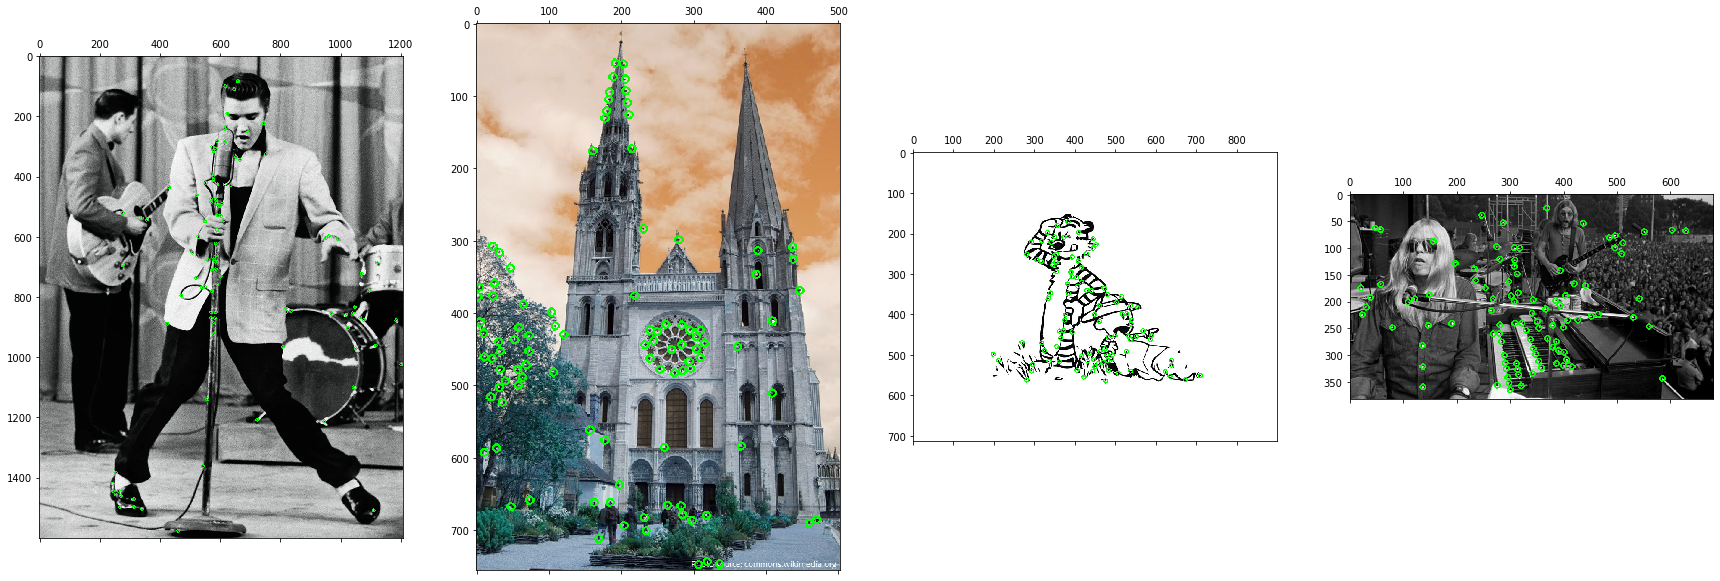

In [7]:
## ----------------------------------------------------------------------------------
##                                  Part (e)
## In the copied images, draw small green circles at each of the 100 keypoints
## ----------------------------------------------------------------------------------
# first place the green circles on the rgb copied images
color = (0,255,0)
for e in elvis_corners:
    X, Y = e.flatten()
    cv2.circle(elvis_copy, (int(X),int(Y)), 5, color, 2)

for c in chartres_corners:
    X, Y = c.flatten()
    cv2.circle(chartres_copy, (int(X),int(Y)), 5, color, 2)

for h in calvinHobbes_corners:
    X, Y = h.flatten()
    cv2.circle(calvinHobbes_copy, (int(X),int(Y)), 5, color, 2)

for a in allmanBros_corners:
    X, Y = a.flatten()
    cv2.circle(allmanBros_copy, (int(X),int(Y)), 5, color, 2)

# now display the images
fig2, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(30, 20))
ax1.matshow(elvis_copy.astype(np.uint8))
ax2.matshow(chartres_copy.astype(np.uint8))
ax3.matshow(calvinHobbes_copy.astype(np.uint8))
ax4.matshow(allmanBros_copy.astype(np.uint8))

plt.show()


In [8]:
# display images
cv2.imshow('Elvis', elvis_copy.astype(np.uint8))
cv2.waitKey()
cv2.imshow('Chartres', chartres_copy.astype(np.uint8))
cv2.waitKey()
cv2.imshow('Calvin & Hobbes', calvinHobbes_copy.astype(np.uint8))
cv2.waitKey()
cv2.imshow('Allman Brothers', allmanBros_copy.astype(np.uint8))
cv2.waitKey()

-1

In [8]:
## ----------------------------------------------------------------------------------
##                                  Part (e-h)
## Call own implementation of Harris corner detector
## ----------------------------------------------------------------------------------
def harrisImplementation(inputImg, minDistance):
    # Step 1: 
    img = inputImg.copy()
    Ix = cv2.Sobel(img, cv2.CV_32F, 1, 0, 5)
    Iy = cv2.Sobel(img, cv2.CV_32F, 0, 1, 5)

    # Step 2:
    Ixx = np.multiply(Ix, Ix)
    Ixy = np.multiply(Ix, Iy)
    Iyy = np.multiply(Iy, Iy)

    # Step 3:
    smoothIxx =cv2.GaussianBlur(Ixx, (5,5), 1)
    smoothIxy =cv2.GaussianBlur(Ixy, (5,5), 1)
    smoothIyy =cv2.GaussianBlur(Iyy, (5,5), 1)

    # Step 4:
    det = np.multiply(Ixx ,Iyy) - Ixy**2
    trace = Ixx + Iyy
    alpha = 0.05
    Q = det - alpha * (trace**2)

    Qflat = Q.flatten()
    Qsorted = np.argsort(Qflat)

    nPoints=100
    color = (0,0,255)
    notYet100 = True
    i = 0
    xCoords = []; yCoords = []
    while notYet100:
        x, y = np.where(Q == Qflat[Qsorted[i]])
        if minDistance == 1:
            anyXL = np.array([x[0] in xCoords, x[0]-1 in xCoords])
            anyXR = np.array([x[0] in xCoords, x[0]+1 in xCoords])
            anyYL = np.array([y[0] in yCoords, y[0]-1 in yCoords])
            anyYR = np.array([y[0] in yCoords, y[0]+1 in yCoords])
        else:
            anyXL = np.array([x[0] in xCoords, x[0]-1 in xCoords, x[0]-2 in xCoords])
            anyXR = np.array([x[0] in xCoords, x[0]+1 in xCoords, x[0]+2 in xCoords])
            anyYL = np.array([y[0] in yCoords, y[0]-1 in yCoords, y[0]-2 in yCoords])
            anyYR = np.array([y[0] in yCoords, y[0]+1 in yCoords, y[0]+2 in yCoords])


        if anyXL.any() | anyXR.any() | anyYL.any() | anyYR.any():
            i = i+1
            continue
        else:
            xCoords.append(int(x[0]))
            yCoords.append(int(y[0]))
        
        i = i+1

        if len(xCoords) == nPoints:
            notYet100 = False

    return xCoords, yCoords

In [9]:
# Elvis
color = (0,0,255)
elvisX, elvisY = harrisImplementation(elvis_gray, 2)
print('Top 3 corners: Elvis')
print('X coordinates: ', elvisX[0:3])
print('Y coordinates: ', elvisY[0:3])
for i in range(100):
    cv2.circle(elvis_copy2, (int(elvisY[i]),int(elvisX[i])), 5, color, 2)

cv2.imshow('Elvis', elvis_copy2.astype(np.uint8))
cv2.waitKey()

Top 3 corners: Elvis
X coordinates:  [837, 424, 765]
Y coordinates:  [827, 618, 500]


-1

In [10]:
# Chartres
color = (0,0,255)
chartresX, chartresY = harrisImplementation(chartres_gray, 2)
print('Top 3 corners: Chartres')
print('X coordinates: ', chartresX[0:3])
print('Y coordinates: ', chartresY[0:3])
for i in range(100):
    cv2.circle(chartres_copy2, (int(chartresY[i]),int(chartresX[i])), 5, color, 2)

cv2.imshow('Chartres', chartres_copy2.astype(np.uint8))
cv2.waitKey()

Top 3 corners: Chartres
X coordinates:  [743, 410, 750]
Y coordinates:  [300, 410, 314]


-1

In [11]:
# Calvin and Hobbes
color = (0,0,255)
calvinHobbesX, calvinHobbesY = harrisImplementation(calvinHobbes_gray, 1)
print('Top 3 corners: Calvin and Hobbes')
print('X coordinates: ', calvinHobbesX[0:3], 'Y coordinates: ', calvinHobbesY[0:3])
for i in range(100):
    cv2.circle(calvinHobbes_copy2, (int(calvinHobbesY[i]),int(calvinHobbesX[i])), 5, color, 2)

cv2.imshow('Calvin and Hobbes', calvinHobbes_copy2.astype(np.uint8))
cv2.waitKey()

Top 3 corners: Calvin and Hobbes
X coordinates:  [219, 532, 540] Y coordinates:  [343, 574, 285]


-1

In [12]:
# Allman Brothers
color = (0,0,255)
allmanBrosX, allmanBrosY = harrisImplementation(allmanBros_gray, 2)
print('Top 3 corners: Chartres')
print('X coordinates: ', allmanBrosX[0:3])
print('Y coordinates: ', allmanBrosY[0:3])
for i in range(100):
    cv2.circle(allmanBros_copy2, (int(allmanBrosY[i]),int(allmanBrosX[i])), 5, color, 2)

cv2.imshow('Allman Brothers', allmanBros_copy2.astype(np.uint8))
cv2.waitKey()

Top 3 corners: Chartres
X coordinates:  [228, 195, 79]
Y coordinates:  [530, 157, 495]


-1

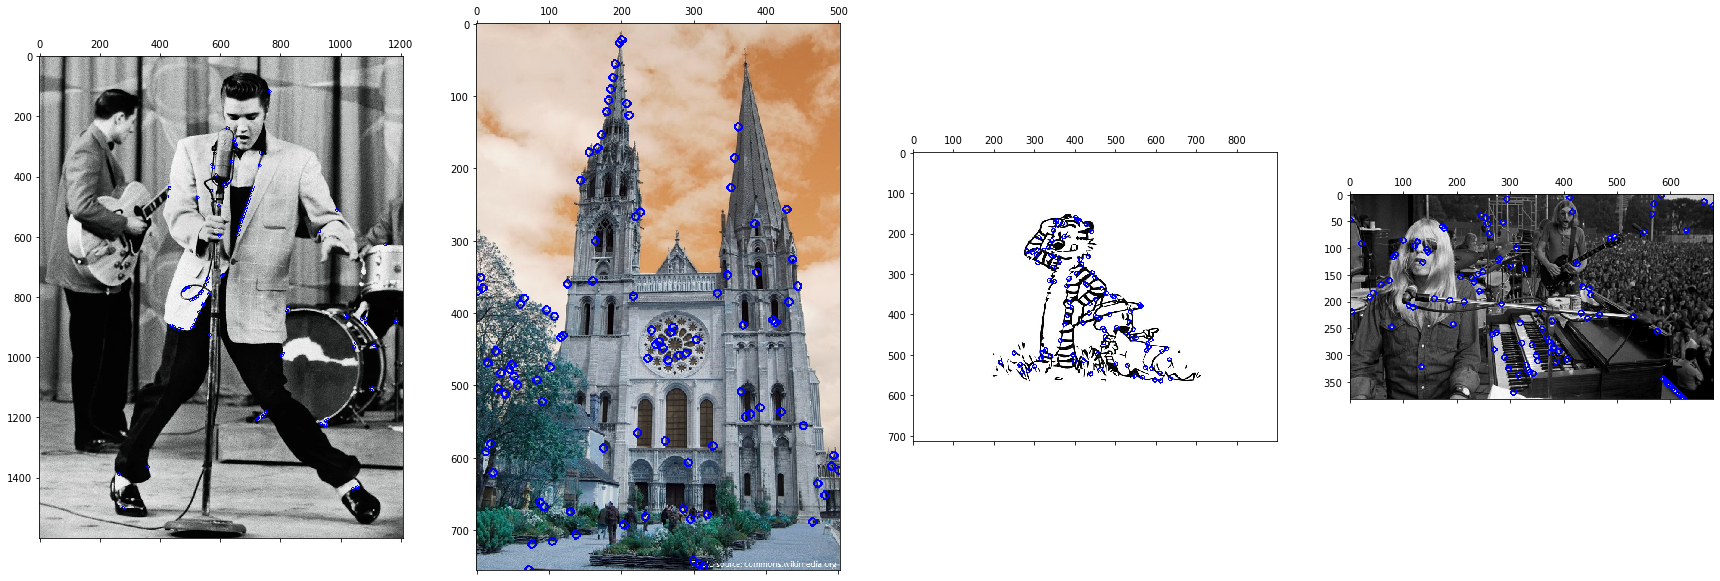

In [14]:
# now display the images
fig3, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(30, 20))
ax1.matshow(elvis_copy2.astype(np.uint8))
ax2.matshow(chartres_copy2.astype(np.uint8))
ax3.matshow(calvinHobbes_copy2.astype(np.uint8))
ax4.matshow(allmanBros_copy2.astype(np.uint8))

plt.show()

In [15]:
# display images
cv2.imshow('Elvis', elvis_copy2.astype(np.uint8))
cv2.waitKey()
cv2.imshow('Chartres', chartres_copy2.astype(np.uint8))
cv2.waitKey()
cv2.imshow('Calvin & Hobbes', calvinHobbes_copy2.astype(np.uint8))
cv2.waitKey()
cv2.imshow('Allman Brothers', allmanBros_copy2.astype(np.uint8))
cv2.waitKey()

-1

In [17]:
## ----------------------------------------------------------------------------------
##                                  Part (i)
## Put the two display images (own implementation on right) together and save images 
## ----------------------------------------------------------------------------------
elvisComparison = np.concatenate((elvis_copy, elvis_copy2), axis=1)
chartresComparison = np.concatenate((chartres_copy, chartres_copy2), axis=1)
calvinHobbesComparison = np.concatenate((calvinHobbes_copy, calvinHobbes_copy2), axis=1)
allmanBrosComparison = np.concatenate((allmanBros_copy, allmanBros_copy2), axis=1)

cv2.imwrite('Elvis_Comparison.png', elvisComparison)
cv2.imwrite('Chartres_Comparison.png', chartresComparison)
cv2.imwrite('CalvinHobbes_Comparison.png', calvinHobbesComparison)
cv2.imwrite('AllmanBros_Comparison.png', allmanBrosComparison)

True